In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X,y=make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20,random_state=13)

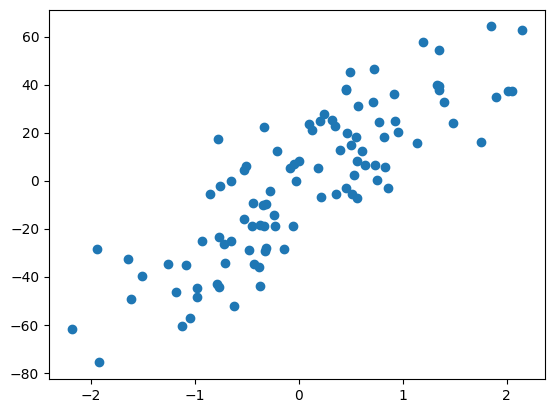

In [3]:
plt.scatter(X,y)

In [5]:
from sklearn.linear_model import LinearRegression

In [7]:
lr=LinearRegression()
lr.fit(X,y)
print(lr.coef_)
print(lr.intercept_)

[27.82809103]
-2.29474455867698


In [8]:
from sklearn.linear_model import Ridge

In [10]:
rr=Ridge(alpha=10)
rr.fit(X,y)
print(rr.coef_)
print(rr.intercept_)

[24.9546267]
-2.1269130035235735


In [11]:
rr1=Ridge(alpha=100)
rr1.fit(X,y)
print(rr.coef_)
print(rr1.intercept_)

[24.9546267]
-1.4248441496033308


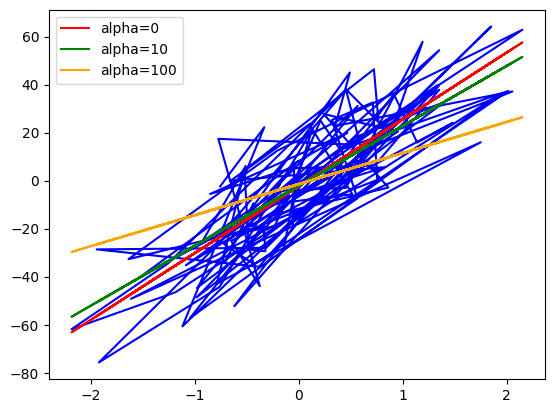

In [15]:
plt.plot(X,y,'b')
plt.plot(X,lr.predict(X),color='red',label='alpha=0')
plt.plot(X,rr.predict(X),color='green',label='alpha=10')
plt.plot(X,rr1.predict(X),color='orange',label='alpha=100')
plt.legend()

From Scratch

In [25]:
class RidgeRegress:
    def __init__(self, alpha=0.1):
        self.alpha = alpha
        self.m = None
        self.b = None

    def fit(self, X_train, y_train):
        num = 0
        den = 0
        for i in range(len(X_train)):
            num = num + (y_train[i] - y_train.mean()) * (X_train[i] - X_train.mean())
            den = den + (X_train[i] - X_train.mean()) ** 2
        self.m = num / (den + self.alpha)
        self.b = y_train.mean() - (self.m * X_train.mean())
        print(self.m, self.b)

    def predict(self, X_test):
        pass

reg = RidgeRegress(alpha=10)
reg.fit(X, y)


[24.9546267] [-2.126913]


##**New data**
(X^TX+LAMBDA I)-1 X^T*Y
W=(XTX)-1XTY

In [26]:
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score
import numpy as np

In [27]:
X,y=load_diabetes(return_X_y=True)

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)

In [30]:
from sklearn.linear_model import Ridge

In [32]:
reg=Ridge(alpha=0.1,solver='cholesky')

In [33]:
reg.fit(X_train,y_train)

Ridge(alpha=0.1, solver='cholesky')

In [34]:
y_pred=reg.predict(X_test)
r2_score(y_test,y_pred)

0.4693128853309805

In [35]:
print(reg.coef_)

[  44.02063391 -241.69329987  452.98665299  332.04420177  -76.33686744
  -68.52143809 -164.98809083  149.96908118  431.61347417   58.51862681]


In [36]:
print(reg.intercept_)

150.89053425602808


In [37]:
#MAIN CODE
class Ridgeregg:
  def __init__(self,alpha=0.1):
    self.alpha=alpha
    self.coef_-None
    self.intercept_=None

  def fit(self,X_train,y_train):
    X_train=np.insert(X_train,0,1,axis=1)
    I=np.identity(X_train.shape[1])
    result=np.linalg.inv(np.dot(X_train.T,X_train)+self.alpha*I).dot(X_train.T).dot(y_train)
    self.intercept_=result[0]
    self.coef_=result[1:]

  def predict(self,X_test):
    return np.dot(X_test,self.coef_)+self.intercept_

In [42]:
reg = Ridgeregg()



In [43]:
reg.fit(X_train, y_train)


In [46]:
'''y_pred = reg.predict(X_test)

print("R^2 Score:", r2_score(y_test, y_pred))'''

'y_pred = reg.predict(X_test)\n\nprint("R^2 Score:", r2_score(y_test, y_pred))'

In [45]:
print("Coefficients:", reg.coef_)
print("Intercept:", reg.intercept_)

Coefficients: [  44.04252774 -241.72019592  452.99153345  332.06044266  -76.32617866
  -68.54884462 -165.01664054  149.93980143  431.59483654   58.54419942]
Intercept: 150.84762720023167
